# A Coronavirus Study



![title](imgs/coronavirus.jpg)

This notebook will analyse COVID-19 data. The data will be obtained from [Our World In Data](https://ourworldindata.org/coronavirus), a scientific online publication whose research team is based at the University of Oxford and focuses on large global problems.


# Import the libraries we will use:

In [60]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

# import dataset and create a data frame
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# Data exploration

In [61]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:
print(f'The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns')

The DataFrame has 57394 rows and 50 columns


What columns do we have?

In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

What data types are our columns?

In [7]:
df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

Ensure the data column is actuaklly a datetime:

In [67]:
df.date = pd.to_datetime(df.date)


# Missing data?

Let's see what columns have the must missing data

In [9]:
(df.isnull().sum()  / df.shape[0]).sort_values(ascending=False) * 100


weekly_icu_admissions_per_million     99.377984
weekly_icu_admissions                 99.377984
weekly_hosp_admissions                98.876189
weekly_hosp_admissions_per_million    98.876189
icu_patients                          92.176883
icu_patients_per_million              92.176883
hosp_patients_per_million             91.279576
hosp_patients                         91.279576
new_tests                             62.039586
new_tests_per_thousand                62.039586
total_tests                           61.638847
total_tests_per_thousand              61.638847
tests_per_case                        60.271108
positive_rate                         59.558490
handwashing_facilities                57.877130
new_tests_smoothed                    57.117469
new_tests_smoothed_per_thousand       57.117469
tests_units                           55.444820
extreme_poverty                       41.507823
reproduction_rate                     34.320661
male_smokers                          31

We can see that the admissions to icu units and hospitals data is lacking the most. Also data on testing is lacking.

# What countries are most affected by COVID-19?

## Looking at the countries with the most cases

In [56]:
today = pd.Timestamp("today").strftime("%Y-%m-%d")

In [11]:
# top  countries - cases
top_cases = df.loc[df['date'] == today, ['location', 'total_cases']].sort_values(by='total_cases', ascending=False)[1:20].reset_index(drop=True)
top_cases

,location,total_cases
0,United States,11205486.0
1,India,8874290.0
2,Brazil,5876464.0
3,France,1991233.0
4,Russia,1971013.0
5,United Kingdom,1390681.0
6,Argentina,1318371.0
7,Italy,1205881.0
8,Colombia,1205217.0
9,Mexico,1009396.0


In [12]:
top_5_cases_country_names = list(top_cases.iloc[:5]['location'].values)

In [13]:
world_cases = df[(df['date'] == today) &  (df['location']=='World')].iloc[0]['total_cases']
world_cases

55154651.0

/home/jim/Desktop/Jupyter Projs/virtualenvs/coronavenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Russia'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'Argentina'),
  Text(7, 0, 'Italy'),
  Text(8, 0, 'Colombia'),
  Text(9, 0, 'Mexico'),
  Text(10, 0, 'Peru'),
  Text(11, 0, 'Germany'),
  Text(12, 0, 'Iran'),
  Text(13, 0, 'South Africa'),
  Text(14, 0, 'Poland'),
  Text(15, 0, 'Ukraine'),
  Text(16, 0, 'Chile'),
  Text(17, 0, 'Iraq'),
  Text(18, 0, 'Indonesia')])

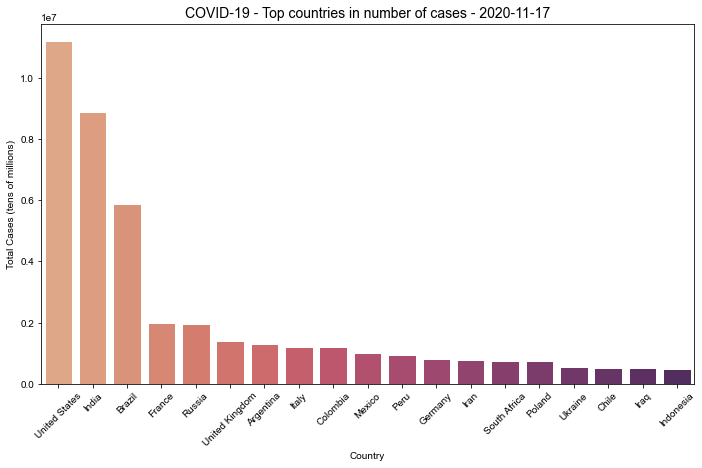

In [14]:
# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(10, 6))
sns.set()

# plot with seaborn
ax = sns.barplot('location', y='total_cases', data=top_cases,
                 palette='flare')
ax.set_title(f'COVID-19 - Top countries in number of cases - {today}', fontsize=14)
ax.set_xlabel('Country')

ax.set_ylabel('Total Cases (tens of millions)')
plt.tight_layout()
plt.savefig('graph1.png')
plt.xticks(rotation=45)


In [15]:
print(f'We have {world_cases:,} worldwide cases of COVID on {today}')

We have 55,154,651.0 worldwide cases of COVID on 2020-11-17


In [16]:

print('Percentage of cases from the top 10 countries on the total number: {:.2%}'.format(top_cases['total_cases'].sum() / world_cases))

Percentage of cases from the top 10 countries on the total number: 76.39%


## Looking at the countries with the most deaths

/home/jim/Desktop/Jupyter Projs/virtualenvs/coronavenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


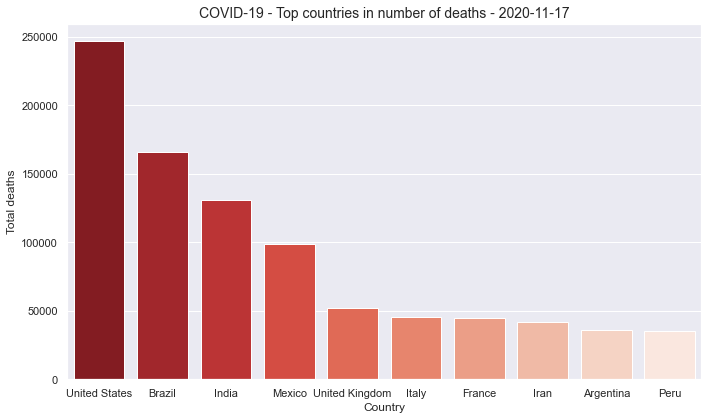

In [17]:
# top countries - deaths
top_deaths =df.loc[df['date'] == today, ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:11].reset_index(drop=True)
top_deaths

# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(10, 6))
sns.set()

# plot with seaborn
ax = sns.barplot('location', y='total_deaths', data=top_deaths,
                 palette='Reds_r')
ax.set_title(f'COVID-19 - Top countries in number of deaths - {today}', fontsize=14)
ax.set_xlabel('Country')
ax.set_ylabel('Total deaths')
plt.tight_layout()
plt.savefig('graph2.png')

In [18]:
world_deaths = df[(df['date'] == today) &  (df['location']=='World')].iloc[0]['total_deaths']
world_deaths

1328537.0

In [19]:
top_5_deaths_country_names = list(top_deaths.iloc[:5]['location'].values)

In [20]:
print(f'We have {world_deaths:,} worldwide deaths from of COVID on {today}')

We have 1,328,537.0 worldwide deaths from of COVID on 2020-11-17


In [21]:
print('Percentage of deaths from the top 10 countries on the total number: {:.2%}'.format(top_deaths['total_deaths'].sum() / world_deaths))

Percentage of deaths from the top 10 countries on the total number: 67.63%


# Rise of COVID

## Case number time series

Here we consider the time series of COVID's rise for the countries with the most cases

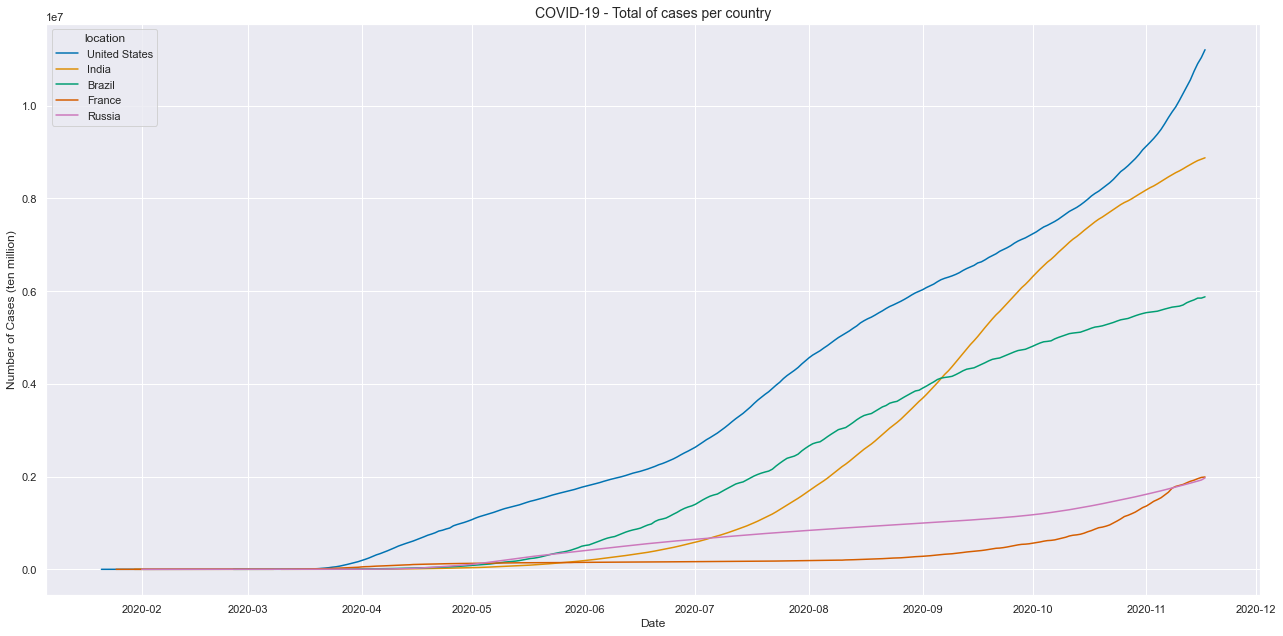

In [22]:
top_evo_cases = df.copy()
top_evo_cases.set_index('location', inplace = True)
top_evo_cases = top_evo_cases.loc[top_5_cases_country_names]
top_evo_cases = top_evo_cases.reset_index()

# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(18, 9))

# plot with seaborn
ax = sns.lineplot(x='date', y='total_cases', hue='location', data=top_evo_cases, 
                  palette='colorblind');
ax.set_title('COVID-19 - Total of cases per country', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases (ten million)')

plt.tight_layout()
plt.savefig('graph3.png')

The number of cases starting increasing around mid to late March for the US, with upsticks around July and again in October, showing no sign of levelling off.

For a while Brazil was the country with the 2nd highest number of cases, until it was overtaken by India in early September. 

## Death count time series

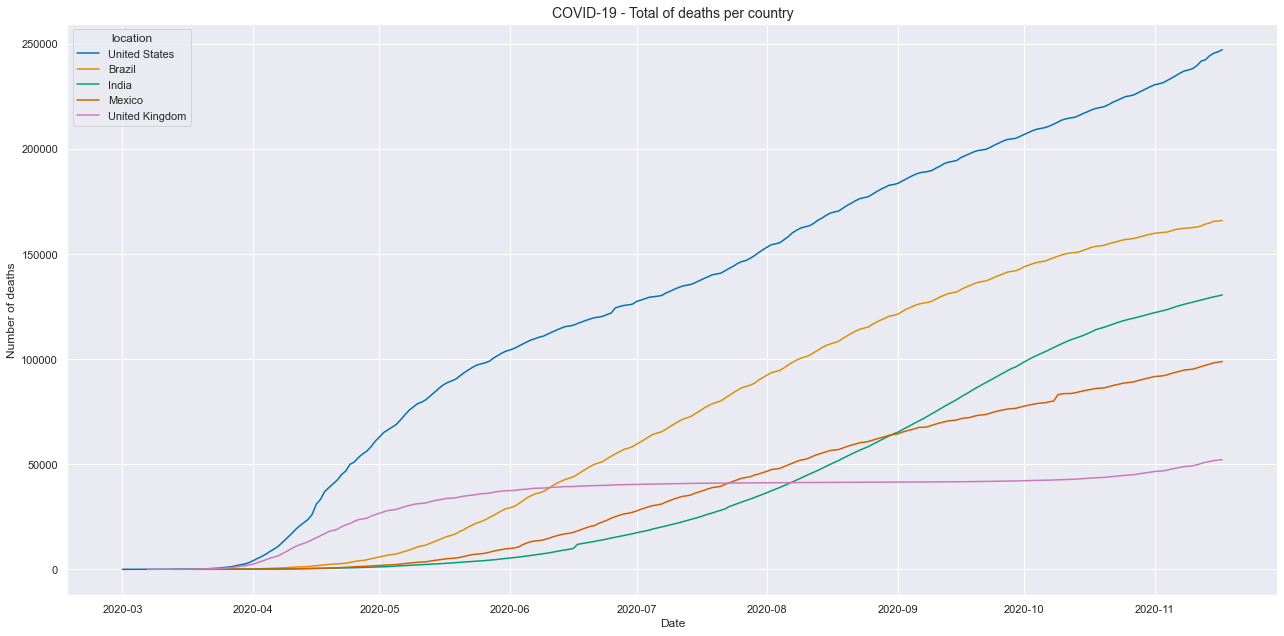

In [23]:
top5_evo_death = df.copy()
top5_evo_death.set_index('location', inplace = True)
top5_evo_death = top5_evo_death.loc[top_5_deaths_country_names]
top5_evo_death = top5_evo_death.reset_index()

# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(18, 9))

# plot with seaborn
ax = sns.lineplot(x='date', y='total_deaths', hue='location', data=top5_evo_death, 
                  palette='colorblind');
ax.set_title('COVID-19 - Total of deaths per country', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Number of deaths')

plt.tight_layout()
plt.savefig('graph4.png')

The US also leads the world in total death count. There the death count has been rising since mid to late March and seems to show no sign of flattening out. Brazil despite now having less cases than India, still leads India in terms of total deaths.

The UK had an initial sharp rise in death count, but appeared to flatten out around late May, however in November it looks like the total death count is once again on the rise.


In [24]:
df_brazil = df.loc[df['location'] == 'Brazil'].copy()
df_brazil.set_index('date', inplace=True)

# A closer look at Brazil

Brazil has been something of an exception to most countries in the world. President Bolsonero is not a fan of lockdowns and the policy in Brazil was much more relaxed than
most countries around the globe. Borders reopened around July and tourism has been allowed since that time.

In [25]:
# Data for just Brazil
df_brazil = df.loc[df['location'] == 'Brazil'].copy()
df_brazil.set_index('date', inplace=True)

In [26]:
df_brazil.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
2020-01-01,BRA,South America,Brazil,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
2020-01-02,BRA,South America,Brazil,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
2020-01-03,BRA,South America,Brazil,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
2020-01-04,BRA,South America,Brazil,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759


In [27]:
# When did Brazil record a first case?
first_case_br = df_brazil.loc[df_brazil['total_cases'] == 1, ['total_cases']].sort_values(by='date').head(1)
first_case_br

,total_cases
date,
2020-02-26,1.0


In [28]:
# When did it record a first death?
first_death_br = df_brazil.loc[df_brazil['total_deaths'] == 1, ['total_deaths']].sort_values(by='date').head(1)
first_death_br

,total_deaths
date,
2020-03-18,1.0


# Let's check the lag between cases reported and total deaths for Brazil

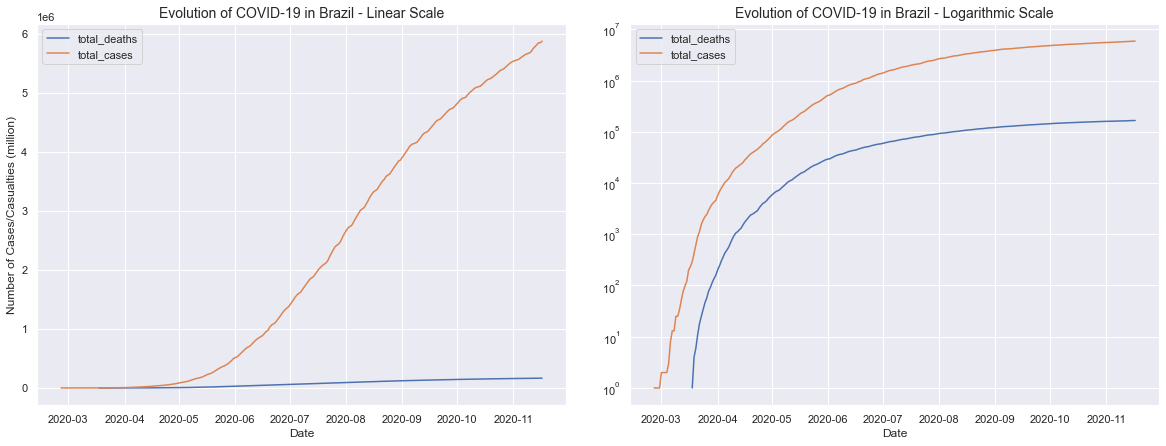

In [29]:

# create the matplotlib figure instance
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# linear scale
ax[0].plot('total_deaths', data=df_brazil)
ax[0].plot('total_cases', data=df_brazil)
ax[0].set_title('Evolution of COVID-19 in Brazil - Linear Scale', fontsize=14)
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of Cases/Casualties (million)')
ax[0].legend()

# logarithmic scale
plt.yscale('log')
ax[1].plot('total_deaths', data=df_brazil)
ax[1].plot('total_cases', data=df_brazil)
ax[1].set_title('Evolution of COVID-19 in Brazil - Logarithmic Scale', fontsize=14)
ax[1].set_xlabel('Date')
ax[1].legend()

plt.tight_layout(pad=3.0)
plt.savefig('graph5.png')

We see that there is a lag between total cases and total deaths that appears to be around 2 weeks

# Economic impact

The data to measure the economic impact was obtained from OECD.stat OECD's quarterly national accounts data, available at [OECD.stat] (https://stats.oecd.org/Index.aspx?DatasetCode=SNA_TABLE1#)

We will compute the percentage change in GDP compared with the same quarter of the previous year (Q2 2019)

In [4]:
df = pd.read_csv('./QNA_16112020232419872.csv')

/home/jim/Desktop/Jupyter Projs/virtualenvs/coronavenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.head()

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Period,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,JPN,Japan,GFSPB,Public sector,CARSA,"National currency, current prices, annual leve...",Q,Quarterly,2017-Q4,Q4-2017,JPY,Yen,6,Millions,NaN,NaN,27492200.0,NaN,NaN
1,JPN,Japan,GFSPB,Public sector,CARSA,"National currency, current prices, annual leve...",Q,Quarterly,2018-Q1,Q1-2018,JPY,Yen,6,Millions,NaN,NaN,27715100.0,NaN,NaN
2,JPN,Japan,GFSPB,Public sector,CARSA,"National currency, current prices, annual leve...",Q,Quarterly,2018-Q2,Q2-2018,JPY,Yen,6,Millions,NaN,NaN,28686300.0,NaN,NaN
3,JPN,Japan,GFSPB,Public sector,CARSA,"National currency, current prices, annual leve...",Q,Quarterly,2018-Q3,Q3-2018,JPY,Yen,6,Millions,NaN,NaN,28041800.0,NaN,NaN
4,JPN,Japan,GFSPB,Public sector,CARSA,"National currency, current prices, annual leve...",Q,Quarterly,2018-Q4,Q4-2018,JPY,Yen,6,Millions,NaN,NaN,27811100.0,NaN,NaN


Here the "B1_GA" is the GDP measured by the "output approach" to calculate GDP. It sums the gross value added of various sectors, plus taxes and less subsidies on products.

For each country compare the Q2 2020 with the Q2 of 2019 to measure the economic impact of COVID:

In [6]:
fdf = df[(df['SUBJECT'] == 'B1_GA')  & (df['Period'].isin(['Q2-2019', 'Q2-2020'])) &  (df['MEASURE'] == 'CQR')]

In [7]:
fdf.head()

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Period,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
454,AUT,Austria,B1_GA,Gross domestic product at market prices - outp...,CQR,"National currency, current prices, quarterly l...",Q,Quarterly,2019-Q2,Q2-2019,EUR,Euro,6,Millions,NaN,NaN,98844.8,NaN,NaN
458,AUT,Austria,B1_GA,Gross domestic product at market prices - outp...,CQR,"National currency, current prices, quarterly l...",Q,Quarterly,2020-Q2,Q2-2020,EUR,Euro,6,Millions,NaN,NaN,85938.3,NaN,NaN
499,BEL,Belgium,B1_GA,Gross domestic product at market prices - outp...,CQR,"National currency, current prices, quarterly l...",Q,Quarterly,2019-Q2,Q2-2019,EUR,Euro,6,Millions,NaN,NaN,120178.0,NaN,NaN
503,BEL,Belgium,B1_GA,Gross domestic product at market prices - outp...,CQR,"National currency, current prices, quarterly l...",Q,Quarterly,2020-Q2,Q2-2020,EUR,Euro,6,Millions,NaN,NaN,103698.0,P,Provisional value
565,CZE,Czech Republic,B1_GA,Gross domestic product at market prices - outp...,CQR,"National currency, current prices, quarterly l...",Q,Quarterly,2019-Q2,Q2-2019,CZK,Czech Koruna,6,Millions,NaN,NaN,1440896.0,NaN,NaN


In [8]:
# I need to take the difference between the 2 quarters for a given country
ifdf = fdf.set_index(['Country', 'Period'])

In [11]:
data = []
for country in ifdf.index.levels[0]:
    diff = (100*(ifdf.loc[country].loc['Q2-2020']['Value'] - ifdf.loc[country].loc['Q2-2019']['Value'])/ifdf.loc[country].loc['Q2-2019']['Value'])
    # int(f'{country}: {diff: .2f}%')
    data.append([country, diff])
    
ec_df = pd.DataFrame(data, columns=['country', 'gdp_diff'])
sorted_df = ec_df.sort_values(by='gdp_diff', ascending=False)


In [28]:
cleaned_df = sorted_df.drop(sorted_df[sorted_df['country'].str.contains('Euro') == True].index)

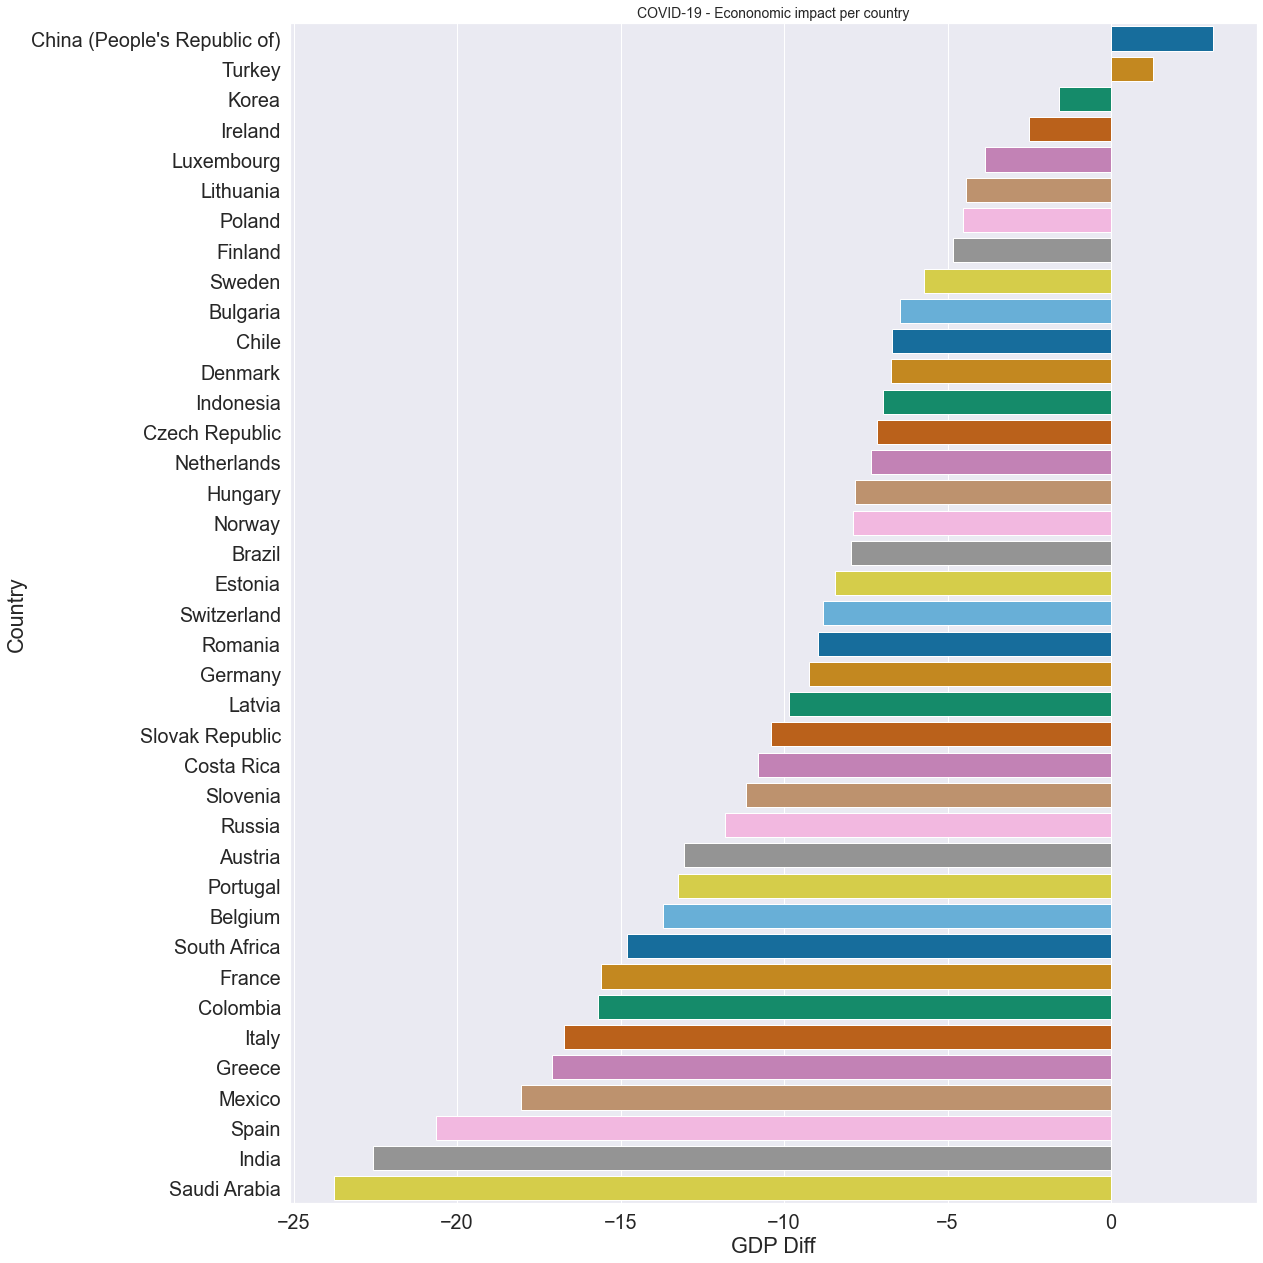

In [45]:

# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(18, 18))

# plot with seaborn
sns.set(font_scale = 1.8)

ax = sns.barplot(x='gdp_diff', y='country', data=cleaned_df, 
                  palette='colorblind');
ax.set_title('COVID-19 - Econonomic impact per country', fontsize=14)
ax.set_xlabel('GDP Diff')
ax.set_ylabel('Country')
   
    
plt.tight_layout()
plt.savefig('graph5.png')

# Scandinavia

In [57]:
scandi_names = ['Sweden', 'Denmark', 'Norway', 'Finland']

In [58]:
scandi_df = cleaned_df[cleaned_df['country'].isin(scandi_names)].sort_values(by='gdp_diff', ascending=False)

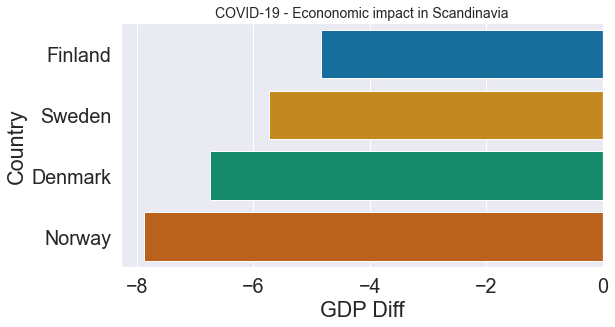

In [59]:
# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(9, 5))

ax = sns.barplot(x='gdp_diff', y='country', data=scandi_df, 
                  palette='colorblind');
ax.set_title('COVID-19 - Econonomic impact in Scandinavia', fontsize=14)
ax.set_xlabel('GDP Diff')
ax.set_ylabel('Country')
   
    
plt.tight_layout()
plt.savefig('graph6.png')

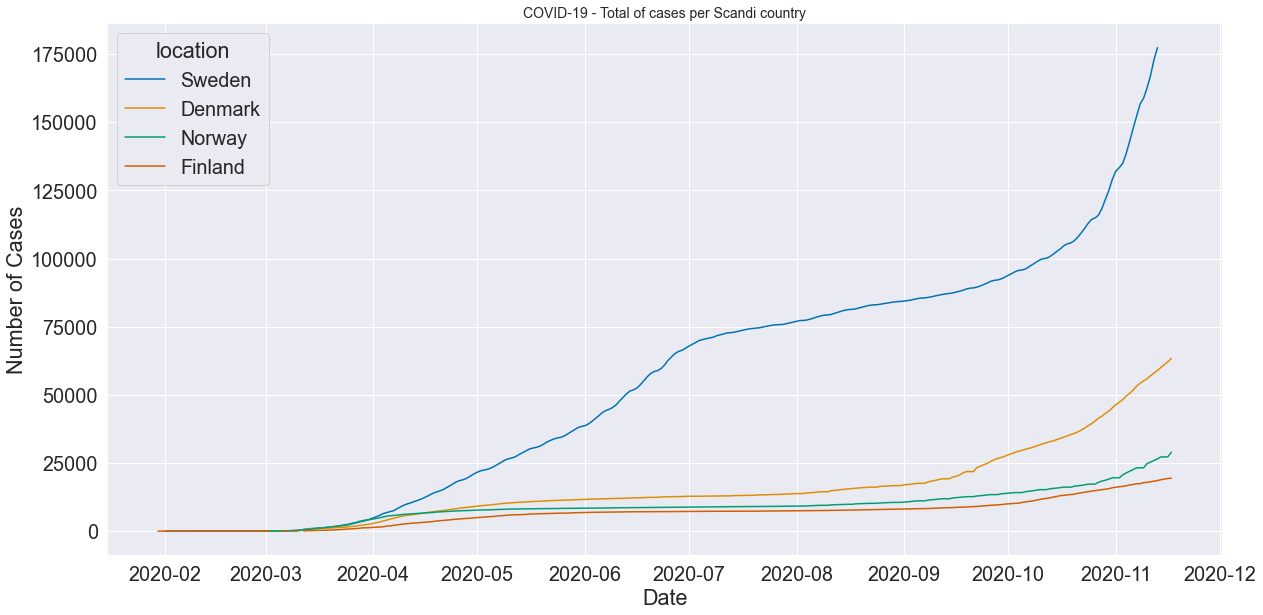

In [69]:
scandi_cases = df.copy()
scandi_cases.set_index('location', inplace = True)
scandi_cases = scandi_cases.loc[scandi_names]
scandi_cases = scandi_cases.reset_index()

# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(18, 9))

# plot with seaborn
ax = sns.lineplot(x='date', y='total_cases', hue='location', data=scandi_cases, 
                  palette='colorblind');
ax.set_title('COVID-19 - Total of cases per Scandi country', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')

plt.tight_layout()
plt.savefig('graph6.png')

In [65]:
scandi_cases.columns

Index(['location', 'iso_code', 'continent', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

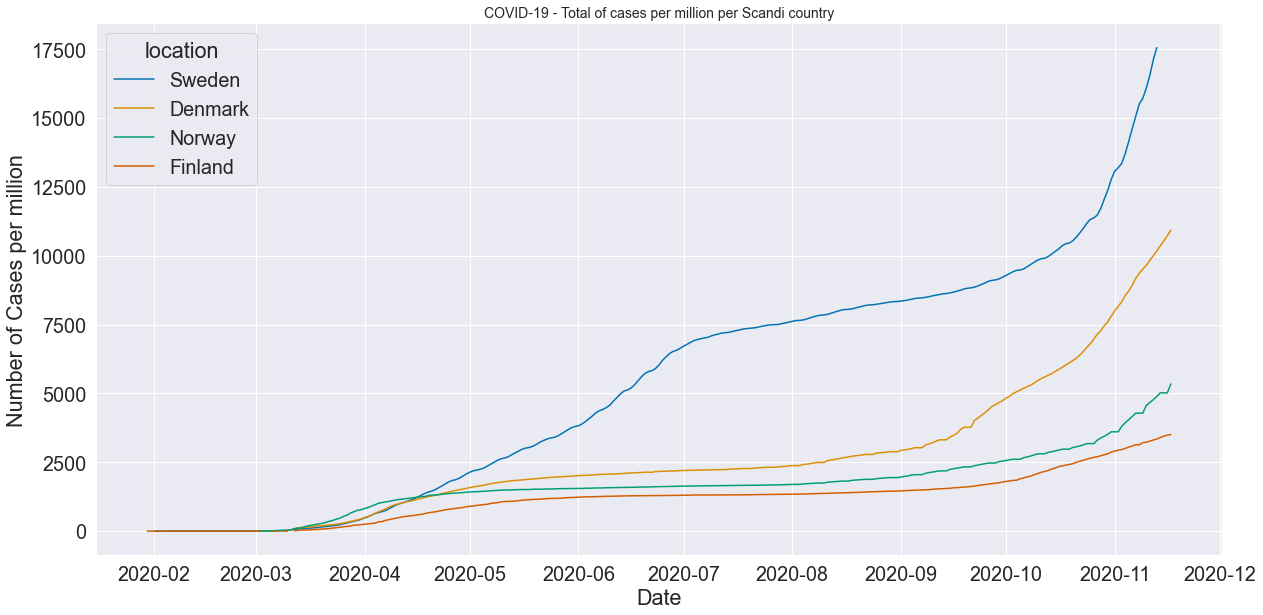

In [68]:
scandi_cases = df.copy()
scandi_cases.set_index('location', inplace = True)
scandi_cases = scandi_cases.loc[scandi_names]
scandi_cases = scandi_cases.reset_index()

# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(18, 9))

# plot with seaborn
ax = sns.lineplot(x='date', y='total_cases_per_million', hue='location', data=scandi_cases, 
                  palette='colorblind');
ax.set_title('COVID-19 - Total of cases per million per Scandi country', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases per million')

plt.tight_layout()
plt.savefig('graph7.png')

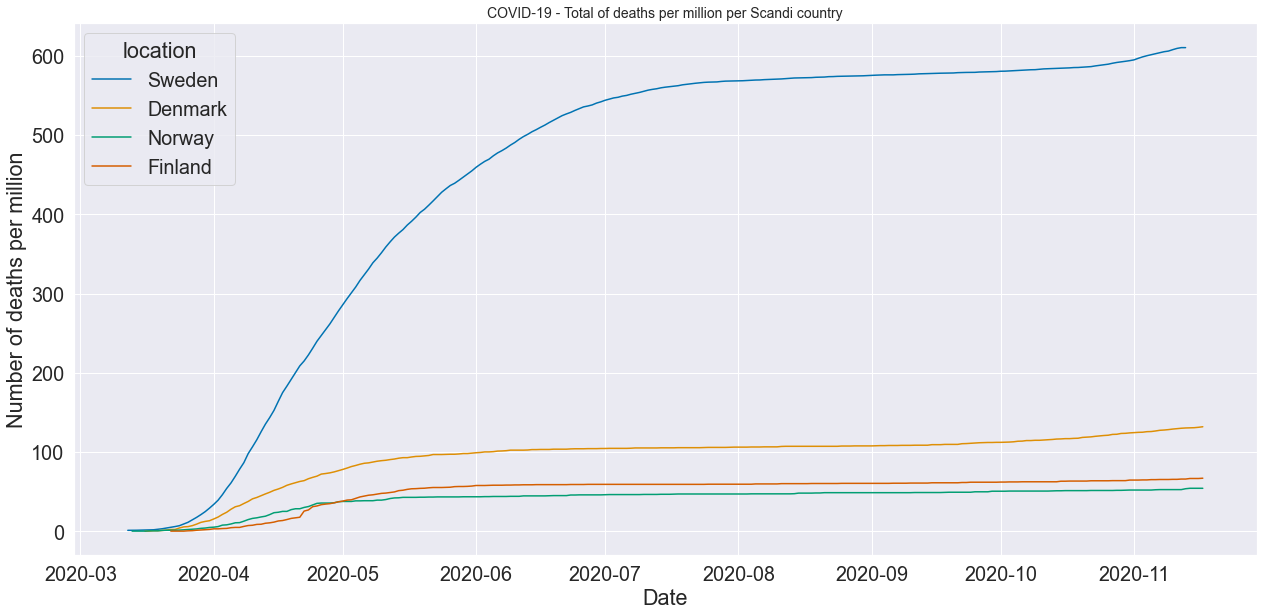

In [71]:
scandi_deaths = df.copy()
scandi_deaths.set_index('location', inplace = True)
scandi_deaths = scandi_deaths.loc[scandi_names]
scandi_deaths = scandi_deaths.reset_index()

# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(18, 9))

# plot with seaborn
ax = sns.lineplot(x='date', y='total_deaths_per_million', hue='location', data=scandi_cases, 
                  palette='colorblind');
ax.set_title('COVID-19 - Total of deaths per million per Scandi country', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Number of deaths per million')

plt.tight_layout()
plt.savefig('graph8.png')

# UK temperature vs Covid cases

In [88]:
weather_api_key = '2b191f37c38147c8a36205912201711'

In [89]:
wdf = pd.read_json(f'http://api.weatherapi.com/v1/history.json?key={weather_api_key}&q=lond')

HTTPError: HTTP Error 400: Bad Request

In [100]:
requests.get(f'http://api.weatherapi.com/v1/history.json?key={weather_api_key}&q=lond&dt=2016-01-01&end_dt=2016-01-05').json()

{'error': {'code': 1008,
  'message': 'API key is limited to get history data. Please check our pricing page and upgrade to higher plan.'}}